In [ ]:
''' 
Simple Linear Regression implementation from scratch
'''

import numpy as np
import pandas as pd
import copy
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline


In [ ]:
''' Load the pandas dataset with seaborn '''
data = sns.load_dataset('tips')

In [ ]:
''' This implementation will only consider the corrleation between meal price and tip value '''
figure = px.scatter(data_frame = data, x="total_bill",
                    y="tip", trendline="ols")
figure.show()

NOTE:
As the bill increases the tip amount increases, but we must investigate further to see if the correlation
is more then just visual.

In [ ]:
''' Assign independent and dependent variables to X and y removing rows with missing targets '''

# Drop missing target values
X = data
X.dropna(axis = 0, subset =['tip'], inplace = True)

# Read data
y_pd = X['tip']
X_pd = X['total_bill']

# convert to numpy (x, 1) dimensions
y = y_pd.values.reshape(-1, 1)
X = X_pd.values.reshape(-1, 1)

print(X[0:5])
print(y[0:5])

<h1>Sklearn Model</h1>

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X, y)
preds = model.predict(X)
print('predictions:\n', preds[0:5])
print('actual:\n', y[0:5])

In [ ]:
# Plotting the data
# plt.scatter(y, preds)
# plt.plot([min(y), max(y)], [min(y), max(y)], color='red')  # Plotting the diagonal line
# plt.xlabel('Actual')
# plt.ylabel('Predicted')
# plt.title('Linear Regression: Actual vs Predicted')
# plt.show()

<h1>Implementation</h1>

In [ ]:
# F(x) = beta0 + beta1 * x

def Variance(x):
    '''
    Outputs pandas dataframe containing the variance of each value in the given 
    x dataframe.
    
    Parameters:
    -- x: meal data
    
    returns:
    -- x_dif, x_var
    '''
    
    # subtract the average from each x value
    x_mean = sum(x) / len(x)
    x_dif = x - x_mean
    x_var = x_dif ** 2
    
    return x_dif, x_var


def Correlation(x_dif, x_var, y_dif, y_var):
    ''' 
    Calculates the corration(r) coefficient for the data indicating the strength
    and direction of the relationship between the input and output.
    
    Parameters:
    -- x_dev: standard deviation of x
    -- x_var: variance of x
    -- y_dev: standard deviation of y
    -- y_var: variance of y
    
    returns:
    -- r
    '''
    # use pearson's correlation coefficient formula
    covariance = x_dif * y_dif
    r = sum(covariance) / np.sqrt(sum(x_var) * sum(y_var))
    
    return r


def Slope(x_dif, x_var, y_dif, y_var):
    ''' 
    Calculates beta1 in the Linear Regression formula y = beta0 + beta1(x).
    
    Parameters:
    -- x_dev: standard deviation of x
    -- x_var: variance of x
    -- y_dev: standard deviation of y
    -- y_var: variance of y
    
    returns:
    -- slope
    '''
    covariance = x_dif * y_dif
    slope = sum(covariance) / sum(x_var)
    
    return slope

def Intercept(x, y, slope):
    '''
    Calculates the intercept of the function.
    
    Parameters:
    -- x: numpy array containing meal costs
    -- y: numpy array containing tip values
    -- slope: linear regression slope between x and y
    
    returns:
    -- intercept
    
    '''
    x_mean = sum(x) / len(x)
    y_mean = sum(y) / len(y)
    intercept = y_mean - slope * x_mean
    
    return intercept
    

def LinearRegressionTest(x, y):
    '''
    Returns a dataframe with the predicted house prices using the
    linear regression model.
    
    Parameters:
    -- slope: linear regression slope between x and y
    -- intercept: intercept of regression line
    -- x: meal data
    -- y: tip data
    
    Returns:
    -- predictions
    '''
    # X and y variance
    x_dif, x_var = Variance(x)
    y_dif, y_var = Variance(y)
    
    # Call slope and intercept
    slope = Slope(x_dif, x_var, y_dif, y_var)
    intercept = Intercept(x, y, slope)
    correlation = Correlation(x_dif, x_var, y_dif, y_var)
    
    predictions = x * slope + intercept
    return predictions, correlation[0]
    
def SquaredError(y, predicted):
    '''
    Returns the squared error between the observed and predicted values
    
    Parameters:
    -- y: observed tip values
    -- predicted: predicted tip values
    
    Returns: error
    '''
    
    difference = y - predicted
    error = sum(difference ** 2)
    return error
    

In [ ]:
''' Making predictions using the implementation '''
imp_preds, r = LinearRegressionTest(X, y)

# Printing r values and predictions
print("r:", r)
print("r_squared:", r ** 2)
print(imp_preds[0:5])
print(preds[0:5])

# comparing error
error = SquaredError(y, imp_preds) / 244 # divided by degrees of freedom (excluding n - 2)
print("Implementation error:", error[0])
print("sklearn error:", mean_squared_error(preds, y))

<li>The r value indicates that their is a "high" correlation between meal price and tips</li>
<li>The implementation v. sklearn prediction values are close and will be tested on excel</li>

In [ ]:
''' Exporting the results for tests on excel'''
# check if the predictions are already flattened
if not isinstance(imp_preds, pd.Series) or not isinstance(preds, pd.Series):
    imp_preds = pd.Series(imp_preds.flatten())
    preds = pd.Series(preds.flatten())
    
# Output the data as a csv
output1 = pd.DataFrame({'Id': X_pd,
                      'MealPrice': imp_preds})
output2 = pd.DataFrame({'Id': X_pd,
                       'MealPrice': preds})

output1.to_csv('sklearn_results.csv', index = False)
output2.to_csv('implementation_results.csv', index = False)


Text(0, 0.5, 'Residual')

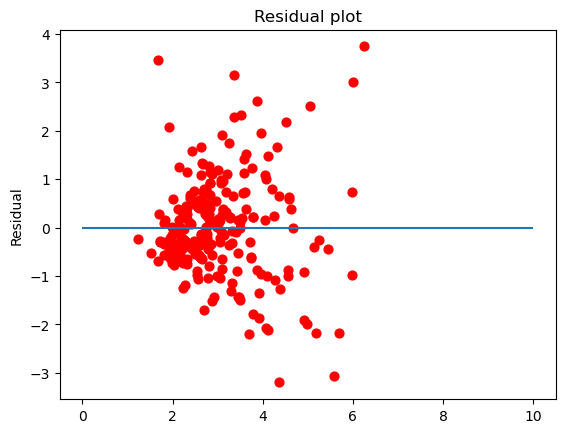

In [41]:
''' Post Analysis '''
#Residual plot
plt.scatter(preds, y - preds, c='r', s = 40)
plt.hlines(y=0, xmin=0, xmax=10)
plt.title('Residual plot')
plt.ylabel('Residual')

- The variance is not constant
- Most points are close to the predicted value
- The outliers are few and are not the only ones completly outside of range
- This model has large error due to its limited prediction capabilities

Mu: 2.99827868852459 sigma: 1.3807999538298954


Text(0.5, 0, 'Meal Price Distribution')

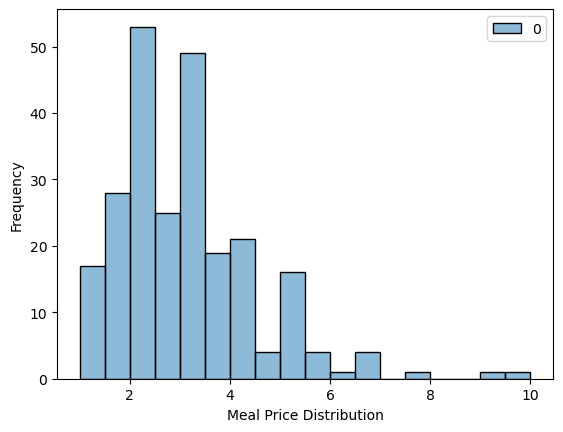

In [54]:
from scipy import stats
from scipy.stats import norm, skew

sns.histplot(y)
(mu, sigma) = norm.fit(y)
print("Mu:", mu, "sigma:", sigma)
plt.ylabel('Frequency')
plt.xlabel('Meal Price Distribution')


- Results are slightly skewed towards the lower prices